# TVA

In [1]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
from src import utils
import pandas as pd
import matplotlib.pyplot as plt
import os

In [24]:
path_voting = "input/voting_result.json"
if "env" in os.environ:
    if os.environ["env"] == "docker":
        path_voting = "/input/voting_result.json"

This is the voting input

In [25]:
voting = utils.read_voting(path_voting)
p, v = voting.shape
voting_table = pd.DataFrame(
    voting, columns=[f"voter_{i}" for i in range(v)], index=[f"preference_{i}" for i in range(p)]
)
voting_table

,voter_0,voter_1,voter_2,voter_3,voter_4
preference_0,C,B,C,B,B
preference_1,A,D,D,D,A
preference_2,D,C,A,C,D
preference_3,B,A,B,A,C


This is just a random plot.

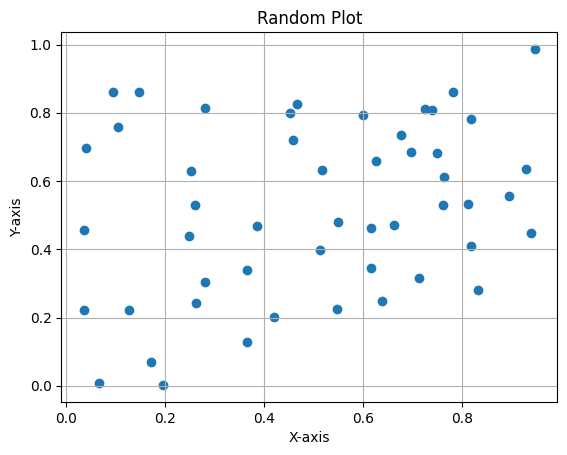

In [4]:
# Generating random data
x = np.random.rand(50)
y = np.random.rand(50)

# Creating the plot
plt.scatter(x, y)
plt.title("Random Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

# Happiness Level

$
HL_i = 1 - \frac{|\sum_{j \in \hat{A}}{(P_{ij} - \hat{P_{j}})}|}{|\hat{A}|}
$

In [44]:
voter_1 = s[:, 0]
outcome = {"B": 3, "C": 2, "D": 1, "A": 0}
preference_voter_1 = {k: (p - i -1) for k, i in zip(voter_1, range(p))}
p, v = s.shape

sum_buffer = 0
for k in preference_voter_1:
    sum_buffer += np.abs(preference_voter_1[k] - outcome[k])

hl_1 = 1-np.divide(sum_buffer, p)
print(hl_1)

-0.5


In [43]:
preference_voter_1

{'C': 3, 'A': 2, 'D': 1, 'B': 0}

In [35]:
s = np.array([
    ["C", "B", "C", "B", "B"],
    ["A", "D", "D", "D", "A"],
    ["D", "C", "A", "C", "D"],
    ["B", "A", "B", "A", "C"],
])

def borda_voting(s: np.array) -> dict:
    p, v = s.shape
    alternatives = np.unique(s)
    alternatives_votes = {a: 0 for a in alternatives}

    for i in range(p):
        p_i_alternatives, counts = np.unique(s[i, :], return_counts=True, )
        for p_i, c in zip(p_i_alternatives, counts):
            alternatives_votes[p_i] += (p - i - 1) * c
            
    # TODO: Return ordered result
            
    return alternatives_votes

In [40]:
borda_voting(s)

{'A': 5, 'B': 9, 'C': 8, 'D': 8}